# 🚚 Optimisation des Opérations Logistiques - FleetOpti AI

Ce notebook analyse l'efficacité de la flotte, les temps de livraison et l'impact des conditions routières.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configuration style
plt.style.use('ggplot')
sns.set_palette("coolwarm")

## 1. Chargement des données

In [2]:
DATA_PATH = '../data/logistics_dataset_with_maintenance_required.csv'
df = pd.read_csv(DATA_PATH)
print(f"Colonnes disponibles : {df.columns.tolist()}")
df.head()

Colonnes disponibles : ['Vehicle_ID', 'Make_and_Model', 'Year_of_Manufacture', 'Vehicle_Type', 'Usage_Hours', 'Route_Info', 'Load_Capacity', 'Actual_Load', 'Last_Maintenance_Date', 'Maintenance_Type', 'Maintenance_Cost', 'Engine_Temperature', 'Tire_Pressure', 'Fuel_Consumption', 'Battery_Status', 'Vibration_Levels', 'Oil_Quality', 'Brake_Condition', 'Failure_History', 'Anomalies_Detected', 'Predictive_Score', 'Maintenance_Required', 'Weather_Conditions', 'Road_Conditions', 'Delivery_Times', 'Downtime_Maintenance', 'Impact_on_Efficiency']


,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193


## 2. Analyse de la Charge vs Capacité

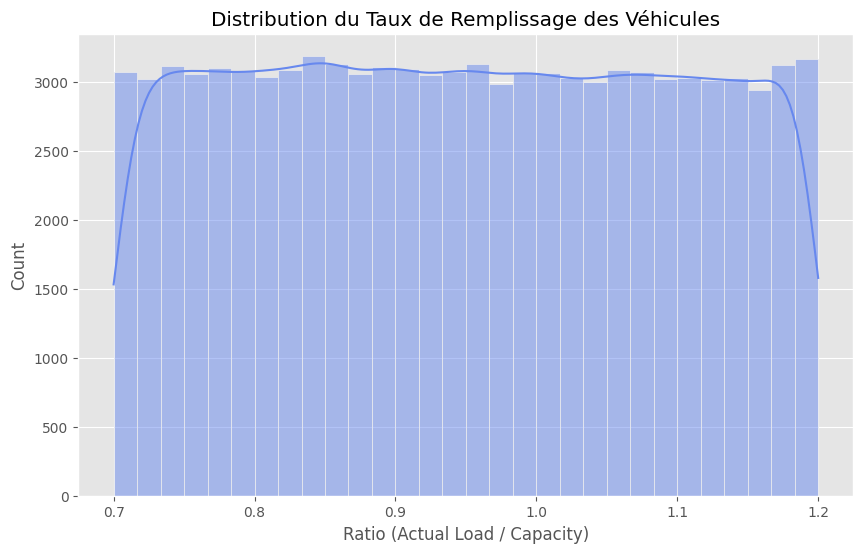

In [3]:
df['Load_Usage_Ratio'] = df['Actual_Load'] / df['Load_Capacity']

plt.figure(figsize=(10, 6))
sns.histplot(df['Load_Usage_Ratio'], bins=30, kde=True)
plt.title('Distribution du Taux de Remplissage des Véhicules')
plt.xlabel('Ratio (Actual Load / Capacity)')
plt.show()

## 3. Temps de Livraison par Conditions Météo

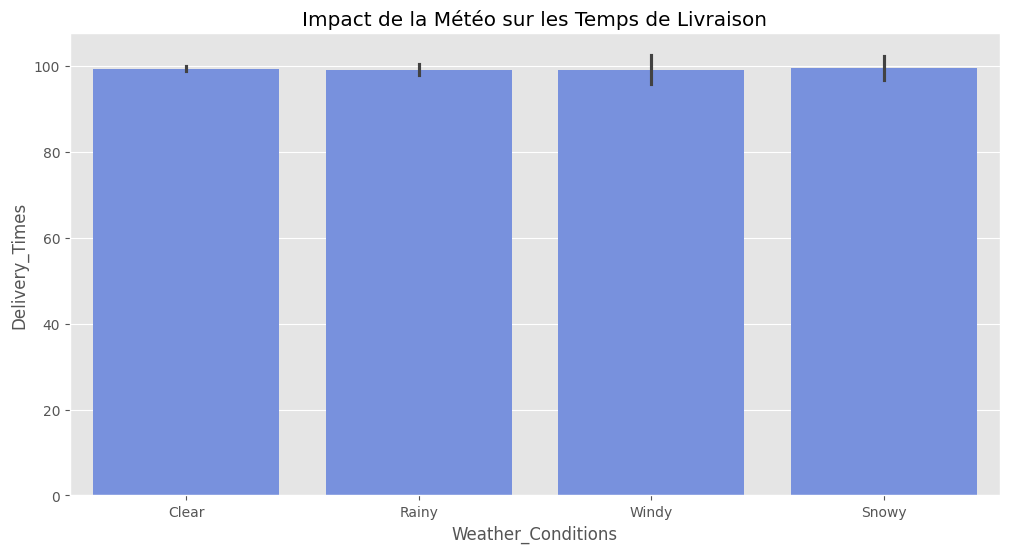

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_Conditions', y='Delivery_Times', data=df)
plt.title('Impact de la Météo sur les Temps de Livraison')
plt.show()

## 4. Consommation de Carburant par Type de Route

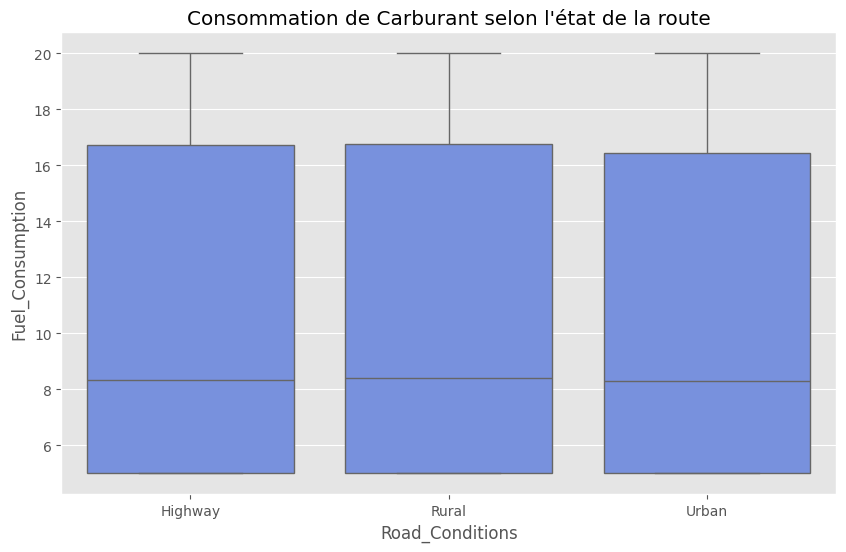

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_Conditions', y='Fuel_Consumption', data=df)
plt.title('Consommation de Carburant selon l\'état de la route')
plt.show()

## 5. Corrélation entre Température Moteur et Pannes

C:\Users\handy\AppData\Local\Temp\ipykernel_5160\3856241066.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="Engine_Temperature", hue="Maintenance_Required", fill=True, common_norm=False)


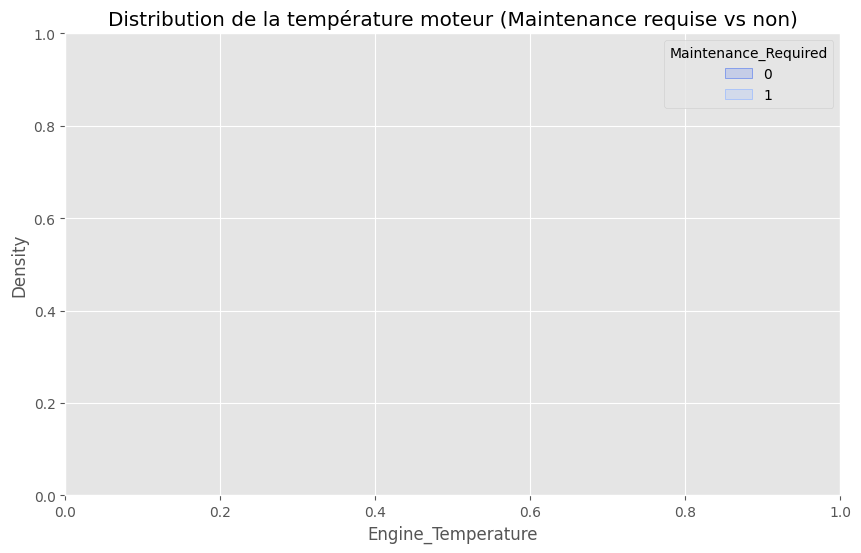

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Engine_Temperature", hue="Maintenance_Required", fill=True, common_norm=False)
plt.title('Distribution de la température moteur (Maintenance requise vs non)')
plt.show()